In [ ]:
import pandas as pd
data = pd.read_csv('agaricus-lepiota.data')
pd.set_option('display.max_columns', None)
#Lay kich thuoc data
print('Data Shape: ', data.shape)

#encode du lieu sang kieu so
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
  data[column] = le.fit_transform(data[column])
  mapping = {idx: label for idx, label in enumerate(le.classes_)}
  print(mapping)

data.columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
data.head()

x = data.drop('class', axis = 1)
y = data['class']

#chia test train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state= 1234)


Data Shape:  (8123, 23)
{0: 'e', 1: 'p'}
{0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}
{0: 'f', 1: 'g', 2: 's', 3: 'y'}
{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}
{0: 'f', 1: 't'}
{0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}
{0: 'a', 1: 'f'}
{0: 'c', 1: 'w'}
{0: 'b', 1: 'n'}
{0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}
{0: 'e', 1: 't'}
{0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'}
{0: 'f', 1: 'k', 2: 's', 3: 'y'}
{0: 'f', 1: 'k', 2: 's', 3: 'y'}
{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
{0: 'p'}
{0: 'n', 1: 'o', 2: 'w', 3: 'y'}
{0: 'n', 1: 'o', 2: 't'}
{0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'}
{0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'}
{0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'}
{0: 'd', 1: 'g', 2: 'l', 3: 'm', 4: 'p', 5: 'u', 6: 'w'}

In [ ]:

data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from keras import models, layers, losses, optimizers
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

#trainning
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

svc = SVC()
svc.fit(x_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

gnb = naive_bayes. GaussianNB()
gnb.fit(x_train,y_train)

#normaliza X_data
from keras import layers
norm_layer = layers.Normalization(axis=-1)
norm_layer.adapt(x)
Xn_train = norm_layer(x_train)
Xn_test = norm_layer(x_test)
# print(Xn_train)
# print(Xn_test)

#changing the shape of y_data to (n,1)
Y_train = y_train.values.reshape(-1,1)
Y_test = y_test.values.reshape(-1,1)

# print(Xn_train.shape, Y_train.shape)
# print(Xn_test.shape, Y_test.shape)

# training neural network
nn = models.Sequential ([
  layers.Dense(units=3, activation  ='relu', name='layer1'),
  layers.Dense(units=1, activation = 'sigmoid', name='layer2')
])
nn.compile(
    loss = losses.BinaryCrossentropy(),
    optimizer = optimizers.Adam(learning_rate=0.01))

# nn.fit(Xn_train, Y_train, epochs = 1000, verbose=0)


pred1 = lr.predict(x_test)
pred2 = knn.predict(x_test)
pred3 = svc.predict(x_test)
pred4 = dt.predict(x_test)
pred5 = gnb.predict(x_test)
# pred6 = nn.predict(Xn_test)
# Y_test_hat = (pred6 >= 0.5). astype(int)
#evaluate



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_scores = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine", "Decision Tree", "Gaussian Naive Bayes", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, pred1),
        accuracy_score(y_test, pred2),
        accuracy_score(y_test, pred3),
        accuracy_score(y_test, pred4),
        accuracy_score(y_test, pred5),
        accuracy_score(Y_test, Y_test_hat),
    ],
    "f1_score": [
        f1_score(y_test, pred1),
        f1_score(y_test, pred2),
        f1_score(y_test, pred3),
        f1_score(y_test, pred4),
        f1_score(y_test, pred5),
        f1_score(Y_test, Y_test_hat),
    ]
}

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df

,Model,Accuracy,f1_score
0,Logistic Regression,0.945231,0.944617
1,K-Nearest Neighbors,0.998769,0.998756
2,Support Vector Machine,0.987692,0.987437
3,Decision Tree,1.000000,1.000000
4,Gaussian Naive Bayes,0.923692,0.923457
5,Neural Network,0.993231,0.993214


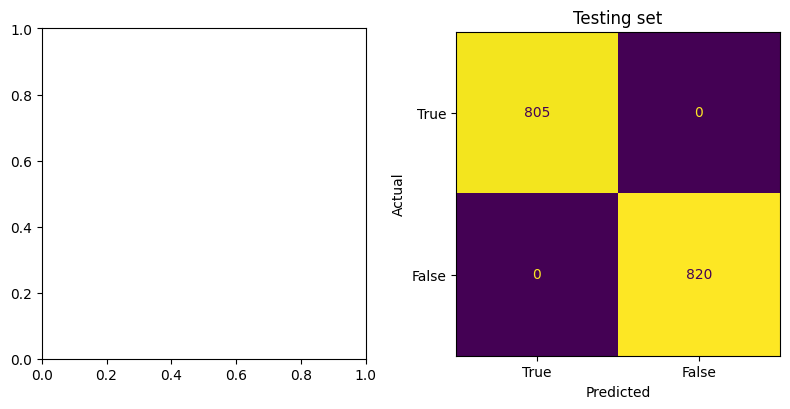

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
metrics. ConfusionMatrixDisplay.from_predictions (y_test, pred4, labels=[True, False], colorbar=False, ax=ax [1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[1].set_title('Testing set')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

attributes = [
    '1. cap-shape: bell=0,conical=1,convex=5,flat=2,knobbed=3,sunken=4',
    '2. cap-surface: fibrous=0,grooves=1,scaly=3,smooth=2',
    '3. cap-color: brown=4,buff=0,cinnamon=1,gray=3,green=6,pink=5,purple=7,red=2,white=8,yellow=9',
    '4. bruises?: bruises=1,no=0',
    '5. odor: almond=0,anise=3,creosote=1,fishy=8,foul=2,musty=4,none=5,pungent=6,spicy=7',
    '6. gill-attachment: attached=0,descending=2,free=1,notched=3',
    '7. gill-spacing: close=0,crowded=1,distant=2',
    '8. gill-size: broad=0,narrow=1',
    '9. gill-color: black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11',
    '10. stalk-shape: enlarging=0,tapering=1',
    '11. stalk-root: bulbous=1,club=2,cup=5,equal=3,rhizomorphs=6,rooted=4,missing=0',
    '12. stalk-surface-above-ring: fibrous=0,scaly=3,silky=1,smooth=2',
    '13. stalk-surface-below-ring: fibrous=0,scaly=3,silky=1,smooth=2',
    '14. stalk-color-above-ring: brown=4,buff=0,cinnamon=1,gray=3,orange=5,pink=6,red=2,white=7,yellow=8',
    '15. stalk-color-below-ring: brown=4,buff=0,cinnamon=1,gray=3,orange=5,pink=6,red=2,white=7,yellow=8',
    '16. veil-type: partial=0,universal=1',
    '17. veil-color: brown=0,orange=1,white=2,yellow=3',
    '18. ring-number: none=0,one=1,two=2',
    '19. ring-type: cobwebby=5,evanescent=0,flaring=1,large=2,none=3,pendant=4,sheathing=6,zone=7',
    '20. spore-print-color: black=2,brown=3,buff=0,chocolate=1,green=5,orange=4,purple=6,white=7,yellow=8',
    '21. population: abundant=0,clustered=1,numerous=2,scattered=3,several=4,solitary=5',
    '22. habitat: grasses=1,leaves=2,meadows=3,paths=4,urban=5,waste=6,woods=0'
]

attributes_str = '\n'.join(attributes)
print(attributes_str)

# Danh sách các lựa chọn cho từng thuộc tính
options = {
    'cap-shape': [0,1,2,3,4,5],
    'cap-surface': [0,1,2,3],
    'cap-color': [0,1,2,3,4,5,6,7,8,9],
    'bruises?': [0,1],
    'odor': [0,1,2,3,4,5,6,7,8],
    'gill-attachment': [0,1,2,3],
    'gill-spacing': [0,1,2],
    'gill-size': [0,1],
    'gill-color': [0,1,2,3,4,5,6,7,8,9,10,11],
    'stalk-shape': [0,1],
    'stalk-root': [0,1,2,3,4,5,6],
    'stalk-surface-above-ring': [0,1,2,3],
    'stalk-surface-below-ring': [0,1,2,3],
    'stalk-color-above-ring': [0,1,2,3,4,5,6,7,8],
    'stalk-color-below-ring': [0,1,2,3,4,5,6,7,8],
    'veil-type': [0,1],
    'veil-color': [0,1,2,3],
    'ring-number': [0,1,2],
    'ring-type': [0,1,2,3,4,5,6,7],
    'spore-print-color': [0,1,2,3,4,5,6,7,8],
    'population': [0,1,2,3,4,5],
    'habitat': [0,1,2,3,4,5,6]
}

# Tạo các dropdown cho từng thuộc tính
dropdowns = {name: widgets.Dropdown(options=opts, description=name.replace('-', ' ').title() + ':') for name, opts in options.items()}

# Hiển thị các dropdown
ui = widgets.VBox(list(dropdowns.values()))

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
button = widgets.Button(description="Predict")
output = widgets.Output()
def on_button_click(b):
    data = {name: dropdown.value for name, dropdown in dropdowns.items()}
    df = pd.DataFrame(data, index=[0])
    transformed_data = pca1.transform(df)
    predictY = knn.predict(transformed_data)
    with output:
        output.clear_output()
        if predictY == 1:
            print("Poisonous")
        else:
            print("Edible")




button.on_click(on_button_click)
display(widgets.VBox([ui, button, output]))
#edible	3	2	4	0	5	0	0	0	11	0	0	2	2	5	5	0	1	1	4	0	1	2


1. cap-shape: bell=0,conical=1,convex=5,flat=2,knobbed=3,sunken=4
2. cap-surface: fibrous=0,grooves=1,scaly=3,smooth=2
3. cap-color: brown=4,buff=0,cinnamon=1,gray=3,green=6,pink=5,purple=7,red=2,white=8,yellow=9
4. bruises?: bruises=1,no=0
5. odor: almond=0,anise=3,creosote=1,fishy=8,foul=2,musty=4,none=5,pungent=6,spicy=7
6. gill-attachment: attached=0,descending=2,free=1,notched=3
7. gill-spacing: close=0,crowded=1,distant=2
8. gill-size: broad=0,narrow=1
9. gill-color: black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11
10. stalk-shape: enlarging=0,tapering=1
11. stalk-root: bulbous=1,club=2,cup=5,equal=3,rhizomorphs=6,rooted=4,missing=0
12. stalk-surface-above-ring: fibrous=0,scaly=3,silky=1,smooth=2
13. stalk-surface-below-ring: fibrous=0,scaly=3,silky=1,smooth=2
14. stalk-color-above-ring: brown=4,buff=0,cinnamon=1,gray=3,orange=5,pink=6,red=2,white=7,yellow=8
15. stalk-color-below-ring: brown=4,buff=0,cinnamon=1,gray=3,orange=5,pi